## Importing necessary libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib as plt
from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Datasets

In [153]:
#loading the datasets

flight = pd.read_csv("/content/drive/MyDrive/Data-Mining/flights.csv")
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [154]:
plane_data = pd.read_csv("/content/drive/MyDrive/Data-Mining/plane-data.csv")
plane_data.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
flight_routes = pd.read_csv("/content/drive/MyDrive/Data-Mining/us_flight_routes.csv", encoding ="utf-16",delimiter='\t')
flight_routes.tail()

,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
4959,3469,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,False,SFO,San Francisco,United States,San Francisco International Airport,Polygon,3682,33.6367,-84.428101,Point,2138.896563,LineString,11,3469,37.618999,-122.375000,Point
4960,3682,MIA,Miami,United States,Miami International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,Polygon,3576,25.7932,-80.290604,Point,594.601524,LineString,12,3682,33.636700,-84.428101,Point
4961,3576,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,MIA,Miami,United States,Miami International Airport,Polygon,3682,33.6367,-84.428101,Point,594.601524,LineString,12,3576,25.793200,-80.290604,Point
4962,3682,ORD,Chicago,United States,Chicago O'Hare International Airport,True,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,Polygon,3830,41.9786,-87.904800,Point,605.810275,LineString,19,3682,33.636700,-84.428101,Point
4963,3830,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,ORD,Chicago,United States,Chicago O'Hare International Airport,Polygon,3682,33.6367,-84.428101,Point,605.810275,LineString,20,3830,41.978600,-87.904800,Point


## Checking number of Categorical and Numerical Attributes

In [156]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [157]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tailnum        5029 non-null   object 
 1   type           4480 non-null   object 
 2   manufacturer   4480 non-null   object 
 3   issue_date     4479 non-null   object 
 4   model          4480 non-null   object 
 5   status         4480 non-null   object 
 6   aircraft_type  4480 non-null   object 
 7   engine_type    4477 non-null   object 
 8   year           4335 non-null   float64
dtypes: float64(1), object(8)
memory usage: 353.7+ KB


In [158]:
flight_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airport ID              4964 non-null   int64  
 1   Destination Airport     4964 non-null   object 
 2   Destination City        4964 non-null   object 
 3   Destination Country     4964 non-null   object 
 4   Destination Name        4964 non-null   object 
 5   Distance                4964 non-null   bool   
 6   Origin Airport          4964 non-null   object 
 7   Origin City             4964 non-null   object 
 8   Origin Country          4964 non-null   object 
 9   Origin Name             4964 non-null   object 
 10  Buffer                  4964 non-null   object 
 11  Destination Airport ID  4964 non-null   int64  
 12  Destination Latitude    4964 non-null   float64
 13  Destination Longitude   4964 non-null   float64
 14  Destination Point       4964 non-null   

## Checking number of missing values in each dataframe

In [159]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,8255
sched_dep_time,0
dep_delay,8255
arr_time,8713
sched_arr_time,0
arr_delay,9430
carrier,0


In [160]:
plane_data.isna().sum()

,0
tailnum,0
type,549
manufacturer,549
issue_date,550
model,549
status,549
aircraft_type,549
engine_type,552
year,694


In [161]:
flight_routes.isna().sum()

,0
Airport ID,0
Destination Airport,0
Destination City,0
Destination Country,0
Destination Name,0
Distance,0
Origin Airport,0
Origin City,0
Origin Country,0
Origin Name,0


## Checking number of rows in each table.

In [162]:
len(flight)


336776

In [163]:
len(plane_data)

5029

In [164]:
len(flight_routes)

4964

## Replacing missing values, and carrying out Data Transformation

Replacing the missing values `dep_time` and `arr_time` with `sched_dep_time` and `sched_arr_time` as we are assuming that if there was no actual departure and arrival time, then the plane departed and arrived as per schedule.

In [165]:
# Replace missing values in dep_time with sched_dep_time
flight.loc[flight['dep_time'].isna(), 'dep_time'] = flight['sched_dep_time']

# Replace missing values in arr_time with sched_arr_time
flight.loc[flight['arr_time'].isna(), 'arr_time'] = flight['sched_arr_time']

flight.isna().sum()


,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,8255
arr_time,0
sched_arr_time,0
arr_delay,9430
carrier,0


Now that we have all the values in `dep_time` and `arr_time`, we can replace the missing values in `dep_delay` and `arr_delay` by subtracting the actual times with the schedule times.

In [166]:
import pandas as pd

# Function to convert HHMM format to total minutes
def convert_to_minutes(time_col):
    # Handle NaN cases for dep_time (since it's float64, it could have NaNs)
    time_col = time_col.fillna(0).astype(int)

    # Extract hours and minutes from HHMM format
    hours = time_col // 100
    minutes = time_col % 100

    # Convert the time into total minutes
    return hours * 60 + minutes

# Convert dep_time and sched_dep_time to minutes
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])
flight['sched_dep_time_minutes'] = convert_to_minutes(flight['sched_dep_time'])

# Replace missing dep_delay values by calculating dep_time - sched_dep_time
flight.loc[flight['dep_delay'].isna(), 'dep_delay'] = flight['dep_time_minutes'] - flight['sched_dep_time_minutes']

# Convert arr_time and sched_arr_time to minutes
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['sched_arr_time_minutes'] = convert_to_minutes(flight['sched_arr_time'])

# Replace missing arr_delay values by calculating arr_time - sched_arr_time
flight.loc[flight['arr_delay'].isna(), 'arr_delay'] = flight['arr_time_minutes'] - flight['sched_arr_time_minutes']

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['dep_time_minutes', 'sched_dep_time_minutes', 'arr_time_minutes', 'sched_arr_time_minutes'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [167]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Replacing the missing values in `air_time` as well by subtracting `arr_time` with `dep_time`

In [168]:
flight['arr_time_minutes'] = convert_to_minutes(flight['arr_time'])
flight['dep_time_minutes'] = convert_to_minutes(flight['dep_time'])

# Replace missing air_time values by calculating arr_time - dep_time
flight.loc[flight['air_time'].isna(), 'air_time'] = flight['arr_time_minutes'] - flight['dep_time_minutes']

# If you need to handle cases where the flight crosses midnight (e.g., dep_time is 2300 and arr_time is 0100):
flight.loc[flight['air_time'] < 0, 'air_time'] += 24 * 60  # Add 24 hours in minutes to fix negative values

# Drop the intermediate time columns if no longer needed
flight = flight.drop(columns=['arr_time_minutes', 'dep_time_minutes'])

# Display the updated flight dataframe
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [169]:
flight.isna().sum()

,0
year,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Removing the `time_hour` column as it is not required

In [170]:
# Remove the 'time_hour' column from the flight dataframe
flight = flight.drop(columns=['time_hour'])

# Display the updated flight dataframe
flight.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


## Merging 2 datasets together.

merging `flight` and `plane_data` using left join on `tailnum` column to create a new `merged_data`.

In [171]:
# Perform left join on a common key, e.g., 'plane_id'
# Replace 'plane_id' with the actual column name common to both datasets
merged_data = pd.merge(flight, plane_data, how='left', on='tailnum')

# Display the first few rows of the merged dataset
merged_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0


In [172]:
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [173]:
len(merged_data)

336776

We will replace the missing values in the new columns of `merged_data` with "Not Available" because we cannot really replace these values with anything. We cannot make up these values. Hence its best suited to just replace them with saying that the data was not available.

"Not Available" - This will show that there are no missing values and you also don't have to loose any data points (in this case, any flights). When creating visualizations using these columns with "Not Available" values, we will just ignore the Not Available values.

In [174]:
# List of columns where missing values should be replaced with 'Not Available'
columns_to_fill = ['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status', 'aircraft_type', 'engine_type', 'year_y']

# Replace missing values in these columns with 'Not Available'
merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna("Not Available")

# Display the updated plane_data dataframe
merged_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [175]:
flight_routes.columns

Index(['Airport ID', 'Destination Airport', 'Destination City',
       'Destination Country', 'Destination Name', 'Distance', 'Origin Airport',
       'Origin City', 'Origin Country', 'Origin Name', 'Buffer',
       'Destination Airport ID', 'Destination Latitude',
       'Destination Longitude', 'Destination Point ', 'Distance (Miles)',
       'Makeline', 'Number of Airlines', 'Origin Airport ID',
       'Origin Latitude', 'Origin Longitude', 'Origin Point'],
      dtype='object')

In [176]:
merged_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y'],
      dtype='object')

## Merging the 3rd Dataset.

Combining `merged_data` and `flight_routes` on `origin` and `dest`. This will give us information of Origina airport, Destination airports, Origin City, Destination City and other Route Information.

In [177]:
# Merge the two datasets on origin and destination airport codes
combined_data = pd.merge(merged_data, flight_routes,
                         how='left',
                         left_on=['origin', 'dest'],
                         right_on=['Origin Airport', 'Destination Airport'])

# Display the first few rows of the combined dataset
combined_data.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3550.0,29.9844,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,3697.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,Polygon,3550.0,29.9844,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,3797.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,Polygon,3576.0,25.7932,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,3697.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3682.0,33.6367,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point


In [178]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Now, when you display the DataFrame, it will show all columns
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Airport ID,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Buffer,Destination Airport ID,Destination Latitude,Destination Longitude,Destination Point,Distance (Miles),Makeline,Number of Airlines,Origin Airport ID,Origin Latitude,Origin Longitude,Origin Point
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3550.0,29.984400,-95.341400,Point,1399.812458,LineString,1.0,3494.0,40.692501,-74.168701,Point
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,3697.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,Polygon,3550.0,29.984400,-95.341400,Point,1416.367401,LineString,2.0,3697.0,40.777199,-73.872597,Point
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,3797.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,Polygon,3576.0,25.793200,-80.290604,Point,1089.635644,LineString,3.0,3797.0,40.639801,-73.778900,Point
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,3697.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3682.0,33.636700,-84.428101,Point,761.521651,LineString,7.0,3697.0,40.777199,-73.872597,Point
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3494.0,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3830.0,41.978600,-87.904800,Point,719.156918,LineString,3.0,3494.0,40.692501,-74.168701,Point
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,3494.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,Polygon,3533.0,26.072599,-80.152702,Point,1064.607704,LineString,2.0,3494.0,40.692501,-74.168701,Point
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,3697.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,Polygon,3714.0,38.944500,-77.455803,Point,228.624105,LineString,1.0,3697.0,40.777199,-73.872597,Point
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,3797.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,

In [179]:
combined_data.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year_y', 'Airport ID',
       'Destination Airport', 'Destination City', 'Destination Country',
       'Destination Name', 'Distance', 'Origin Airport', 'Origin City',
       'Origin Country', 'Origin Name', 'Buffer', 'Destination Airport ID',
       'Destination Latitude', 'Destination Longitude', 'Destination Point ',
       'Distance (Miles)', 'Makeline', 'Number of Airlines',
       'Origin Airport ID', 'Origin Latitude', 'Origin Longitude',
       'Origin Point'],
      dtype='object')

Removing unncessary columns that won't be required for analysis.

In [180]:
# Remove the 'time_hour' column from the flight dataframe
combined_data = combined_data.drop(columns=['Buffer','Makeline','Origin Latitude','Origin Longitude','Origin Point','Destination Airport ID',
                                            'Destination Latitude', 'Destination Longitude','Destination Point ','Origin Point',
                                            'Origin Point','Distance (Miles)','Origin Airport ID','Airport ID'])

# Display the updated flight dataframe
combined_data.head(55)


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [181]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Let's find out the what are the destination airports that are having missing values for the particular `dest` in our flights.

In [182]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_destination_city = combined_data[combined_data['Destination City'].isna()]

# Get the value counts of 'dest' for those rows
dest_value_counts = missing_destination_city['dest'].value_counts()

dest_value_counts

,count
dest,
SJU,5819
BQN,896
HNL,707
STT,522
BDL,443
PSE,365
MCI,276
AVL,275
IAH,274


Doing the same for Origin as well.

In [183]:
# Filter rows where 'Destination City' has missing values (NaN)
missing_origin_city = combined_data[combined_data['Origin City'].isna()]

# Get the value counts of 'dest' for those rows
missing_origin_counts = missing_destination_city['origin'].value_counts()

missing_origin_counts

,count
origin,
JFK,7736
EWR,2966
LGA,246


To manually replace the missing values in the `Destination City` and `Destination Country` column based on the `dest` codes and their corresponding cities, we can create a mapping between dest and Destination City, and then apply this mapping to fill the missing values.





In [184]:
# Create a mapping dictionary for 'dest' to 'Destination City'
city_mapping = {
    'SJU': 'Carolina',
    'BQN': 'Aguadilla',
    'HNL': 'Honolulu',
    'STT': 'St. Thomas',
    'BDL': 'Windsor Locks',
    'PSE': 'Ponce',
    'MCI': 'Missouri',
    'AVL': 'Fletcher',
    'IAH': 'Houston',
    'ACK': 'Nantucket',
    'MVY': 'West Tisbury',
    'EGE': 'Eagle County',
    'MKE': 'Milwaukee',
    'CRW': 'Charleston',
    'CAE': 'West Columbia',
    'TVC': 'Traverse City',
    'BZN': 'Bozeman',
    'JAC': 'Jackson',
    'PSP': 'Palm Springs',
    'HDN': 'Hayden',
    'MTJ': 'Montrose',
    'BWI': 'Baltimore',
    'SBN': 'South Bend',
    'ANC': 'Anchorage',
    'MEM': 'Memphis',
    'BHM': 'Birmingham',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'dest' to 'Destination Country'
country_mapping = {
    'SJU': 'Puerto Rico',
    'BQN': 'Puerto Rico',
    'HNL': 'Hawaii',
    'STT': 'US Virgin Islands',
    'BDL': 'United States',
    'PSE': 'Puerto Rico',
    'MCI': 'United States',
    'AVL': 'United States',
    'IAH': 'United States',
    'ACK': 'United States',
    'MVY': 'United States',
    'EGE': 'United States',
    'MKE': 'United States',
    'CRW': 'United States',
    'CAE': 'United States',
    'TVC': 'United States',
    'BZN': 'United States',
    'JAC': 'United States',
    'PSP': 'United States',
    'HDN': 'United States',
    'MTJ': 'United States',
    'BWI': 'United States',
    'SBN': 'United States',
    'ANC': 'United States',
    'MEM': 'United States',
    'BHM': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Destination City' using the city_mapping
combined_data['Destination City'] = combined_data['Destination City'].fillna(combined_data['dest'].map(city_mapping))

# Replace missing values in 'Destination Country' using the country_mapping
combined_data['Destination Country'] = combined_data['Destination Country'].fillna(combined_data['dest'].map(country_mapping))

# Display the updated combined_data dataframe
combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Doing the same for Origin City and Origin Country with origin

In [185]:
# Create a mapping dictionary for 'origin' to 'Origin City'
origin_city_mapping = {
    'JFK': 'New York',
    'EWR': 'Newark',
    'LGA': 'LaGuardia'
}

# Create a mapping dictionary for 'origin' to 'Origin Country'
origin_country_mapping = {
    'JFK': 'United States',
    'EWR': 'United States',
    'LGA': 'United States'
}

# Replace missing values in 'Origin City' using the origin_city_mapping
combined_data['Origin City'] = combined_data['Origin City'].fillna(combined_data['origin'].map(origin_city_mapping))

# Replace missing values in 'Origin Country' using the origin_country_mapping
combined_data['Origin Country'] = combined_data['Origin Country'].fillna(combined_data['origin'].map(origin_country_mapping))

combined_data.isna().sum()


,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


Creating mappings for Desitnation Name and Origin Name as well.

In [186]:
# Create a mapping dictionary for 'dest' to 'Destination Name' (airport names)
destination_name_mapping = {
    'SJU': 'Luis Muñoz Marín International Airport',
    'BQN': 'Rafael Hernández Airport',
    'HNL': 'Daniel K. Inouye International Airport',
    'STT': 'Cyril E. King Airport',
    'BDL': 'Bradley International Airport',
    'PSE': 'Mercedita International Airport',
    'MCI': 'Kansas City International Airport',
    'AVL': 'Asheville Regional Airport',
    'IAH': 'George Bush Intercontinental Airport',
    'ACK': 'Nantucket Memorial Airport',
    'MVY': 'Martha\'s Vineyard Airport',
    'EGE': 'Eagle County Regional Airport',
    'MKE': 'General Mitchell International Airport',
    'CRW': 'Yeager Airport',
    'CAE': 'Columbia Metropolitan Airport',
    'TVC': 'Cherry Capital Airport',
    'BZN': 'Bozeman Yellowstone International Airport',
    'JAC': 'Jackson Hole Airport',
    'PSP': 'Palm Springs International Airport',
    'HDN': 'Yampa Valley Regional Airport',
    'MTJ': 'Montrose Regional Airport',
    'BWI': 'Baltimore/Washington International Thurgood Marshall Airport',
    'SBN': 'South Bend International Airport',
    'ANC': 'Ted Stevens Anchorage International Airport',
    'MEM': 'Memphis International Airport',
    'BHM': 'Birmingham-Shuttlesworth International Airport',
    'LGA': 'LaGuardia Airport'
}

# Create a mapping dictionary for 'origin' to 'Origin Name' (airport names)
origin_name_mapping = {
    'JFK': 'John F. Kennedy International Airport',
    'EWR': 'Newark Liberty International Airport',
    'LGA': 'LaGuardia Airport'
}

# Replace missing values in 'Destination Name' using the destination_name_mapping
combined_data['Destination Name'] = combined_data['Destination Name'].fillna(combined_data['dest'].map(destination_name_mapping))

# Replace missing values in 'Origin Name' using the origin_name_mapping
combined_data['Origin Name'] = combined_data['Origin Name'].fillna(combined_data['origin'].map(origin_name_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [187]:
# Replace missing values in 'Destination Airport' with the respective values from 'dest'
combined_data['Destination Airport'] = combined_data['Destination Airport'].fillna(combined_data['dest'])

# Replace missing values in 'Origin Airport' with the respective values from 'origin'
combined_data['Origin Airport'] = combined_data['Origin Airport'].fillna(combined_data['origin'])

combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


In [188]:
combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


To replace the missing values in the `Number of Airlines` column with the number of airlines that fly to each Destination Airport, we can follow these steps:

* Count the Number of Airlines per Destination Airport: This will involve grouping the data by `Destination Airport` and counting the number of unique airlines (`carrier`).
* Use this information to fill missing values in Number of Airlines.



In [189]:
# Step 1: Group by 'Destination Airport' and count the number of unique carriers (airlines)
airlines_per_destination = combined_data.groupby('Destination Airport')['carrier'].nunique()

# Step 2: Create a mapping of 'Destination Airport' to the number of airlines
airlines_mapping = airlines_per_destination.to_dict()

airlines_mapping

{'ABQ': 1,
 'ACK': 1,
 'ALB': 1,
 'ANC': 1,
 'ATL': 7,
 'AUS': 6,
 'AVL': 2,
 'BDL': 2,
 'BGR': 2,
 'BHM': 1,
 'BNA': 5,
 'BOS': 7,
 'BQN': 2,
 'BTV': 3,
 'BUF': 4,
 'BUR': 1,
 'BWI': 4,
 'BZN': 1,
 'CAE': 2,
 'CAK': 1,
 'CHO': 1,
 'CHS': 4,
 'CLE': 5,
 'CLT': 7,
 'CMH': 3,
 'CRW': 1,
 'CVG': 4,
 'DAY': 2,
 'DCA': 6,
 'DEN': 5,
 'DFW': 4,
 'DSM': 2,
 'DTW': 6,
 'EGE': 2,
 'EYW': 1,
 'FLL': 4,
 'GRR': 2,
 'GSO': 2,
 'GSP': 2,
 'HDN': 1,
 'HNL': 2,
 'HOU': 2,
 'IAD': 6,
 'IAH': 2,
 'ILM': 1,
 'IND': 5,
 'JAC': 2,
 'JAX': 4,
 'LAS': 5,
 'LAX': 5,
 'LEX': 1,
 'LGA': 1,
 'LGB': 1,
 'MCI': 3,
 'MCO': 4,
 'MDW': 1,
 'MEM': 3,
 'MHT': 2,
 'MIA': 3,
 'MKE': 4,
 'MSN': 2,
 'MSP': 6,
 'MSY': 6,
 'MTJ': 1,
 'MVY': 2,
 'MYR': 1,
 'OAK': 1,
 'OKC': 1,
 'OMA': 3,
 'ORD': 7,
 'ORF': 3,
 'PBI': 5,
 'PDX': 3,
 'PHL': 5,
 'PHX': 5,
 'PIT': 6,
 'PSE': 1,
 'PSP': 1,
 'PVD': 1,
 'PWM': 3,
 'RDU': 5,
 'RIC': 2,
 'ROC': 3,
 'RSW': 4,
 'SAN': 4,
 'SAT': 3,
 'SAV': 1,
 'SBN': 1,
 'SDF': 3,
 'SEA': 5,
 'SFO': 5,

In [190]:
combined_data['Number of Airlines'] = combined_data['Number of Airlines'].fillna(combined_data['Destination Airport'].map(airlines_mapping))

combined_data.isna().sum()

,0
year_x,0
month,0
day,0
dep_time,0
sched_dep_time,0
dep_delay,0
arr_time,0
sched_arr_time,0
arr_delay,0
carrier,0


In [191]:
combined_data.head(10)

,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_y,Destination Airport,Destination City,Destination Country,Destination Name,Distance,Origin Airport,Origin City,Origin Country,Origin Name,Number of Airlines
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,EWR,Newark,United States,Newark Liberty International Airport,1.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,IAH,Houston,United States,George Bush Intercontinental Houston Airport,False,LGA,New York,United States,La Guardia Airport,2.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,MIA,Miami,United States,Miami International Airport,False,JFK,New York,United States,John F Kennedy International Airport,3.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,BQN,Aguadilla,Puerto Rico,Rafael Hernández Airport,NaN,JFK,New York,United States,John F. Kennedy International Airport,2.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,ATL,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,True,LGA,New York,United States,La Guardia Airport,7.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,EWR,Newark,United States,Newark Liberty International Airport,3.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,FLL,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,False,EWR,Newark,United States,Newark Liberty International Airport,2.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,IAD,Washington,United States,Washington Dulles International Airport,True,LGA,New York,United States,La Guardia Airport,1.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,MCO,Orlando,United States,Orlando International Airport,True,JFK,New York,United States,John F Kennedy International Airport,4.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,ORD,Chicago,United States,Chicago O'Hare International Airport,True,LGA,New York,United States,La Guardia Airport,5.0


Finally removing some few columns. Renaming certain columns for better clarity.

In [192]:
# Step 1: Remove the columns 'Distance', 'Destination Airport', and 'Origin Airport'
combined_data = combined_data.drop(columns=['Distance', 'Destination Airport', 'Origin Airport'])

# Step 2: Rename 'year_x' to 'Flight Year' and 'year_y' to 'Manufacturing Year'
combined_data = combined_data.rename(columns={'year_x': 'Flight Year', 'year_y': 'Manufacturing Year'})

Creating a boolean `Delayed` column with `Yes` or `No` values based on if `arr_delay` > 0, then the flight was delayed. This column is going to be our target column for future machine learning models.

In [193]:
# Create a boolean column 'Delayed'
combined_data['Delayed'] = np.where(combined_data['arr_delay'] > 0, 'Yes', 'No')

## Final Cleaned Data.
Finally, after cleaning, transformations, reductions, quality checks, merging, we have our `combined_data` as the final cleaned data that can now be used for further EDA and answering our questions.

In [194]:
combined_data.head(10)

,Flight Year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacturing Year,Destination City,Destination Country,Destination Name,Origin City,Origin Country,Origin Name,Number of Airlines,Delayed
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Houston,United States,George Bush Intercontinental Houston Airport,Newark,United States,Newark Liberty International Airport,1.0,Yes
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,Corporation,BOEING,07/31/1998,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998.0,Houston,United States,George Bush Intercontinental Houston Airport,New York,United States,La Guardia Airport,2.0,Yes
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,Corporation,BOEING,12/14/1999,757-223,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990.0,Miami,United States,Miami International Airport,New York,United States,John F Kennedy International Airport,3.0,Yes
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Aguadilla,Puerto Rico,Rafael Hernández Airport,New York,United States,John F. Kennedy International Airport,2.0,No
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,Corporation,BOEING,06/26/1991,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991.0,Atlanta,United States,Hartsfield Jackson Atlanta International Airport,New York,United States,La Guardia Airport,7.0,No
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,Newark,United States,Newark Liberty International Airport,3.0,Yes
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,Foreign Corporation,AIRBUS INDUSTRIE,10/05/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2000.0,Fort Lauderdale,United States,Fort Lauderdale Hollywood International Airport,Newark,United States,Newark Liberty International Airport,2.0,Yes
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,Corporation,CANADAIR,04/23/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,Washington,United States,Washington Dulles International Airport,New York,United States,La Guardia Airport,1.0,No
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,Corporation,AIRBUS,09/29/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004.0,Orlando,United States,Orlando International Airport,New York,United States,John F Kennedy International Airport,4.0,No
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Chicago,United States,Chicago O'Hare International Airport,New York,United States,La Guardia Airport,5.0,Yes


In [195]:
combined_data.columns

Index(['Flight Year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'Manufacturing Year',
       'Destination City', 'Destination Country', 'Destination Name',
       'Origin City', 'Origin Country', 'Origin Name', 'Number of Airlines',
       'Delayed'],
      dtype='object')

**DATA VISUALIZATIONS**

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

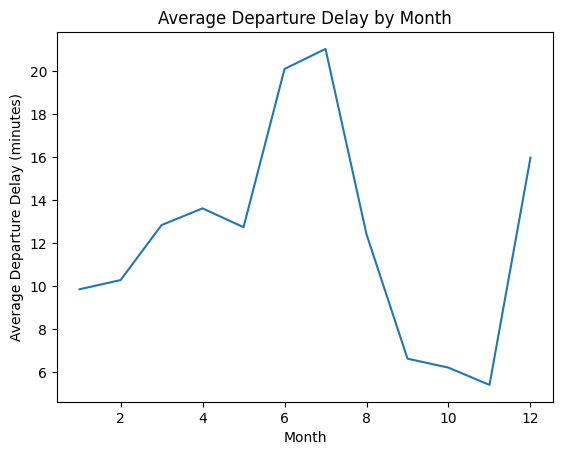

In [197]:
combined_data.groupby('month')['dep_delay'].mean().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Month')

# Display the plot
plt.show()


The maximum departure delays happen in the summer months with July being the highest followed by June. December month has the third highest departure delays. These can be attributed to peak travel season during the summer and winter months and weather conditions in those months.

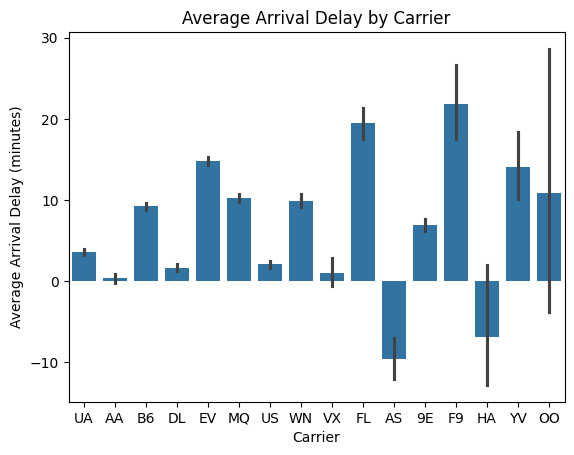

In [198]:

sns.barplot(x='carrier', y='arr_delay', data=combined_data)

# Add labels
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Carrier')

# Display the plot
plt.show()


The bar plot above shows the mean of the arrival delays for each carrier. 'AS' carrier has before time arrival as shown by negative 10 value. 'HA' has second before time arrivals. The airline carrier with maximum mean arrival delays is 'F9'.

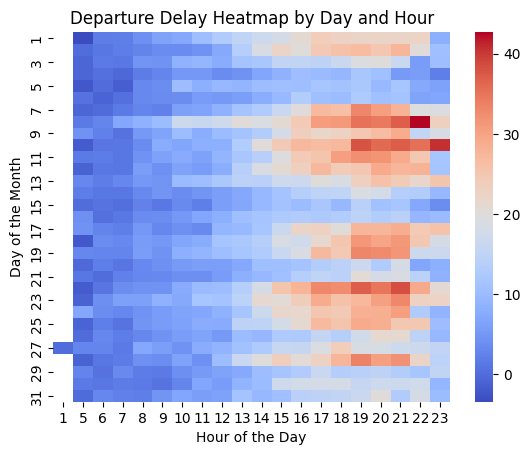

In [199]:
delay_matrix = combined_data.pivot_table(index='day', columns='hour', values='dep_delay')
sns.heatmap(delay_matrix, cmap='coolwarm')

plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.title('Departure Delay Heatmap by Day and Hour')

# Display the plot
plt.show()

As seen on the color scheme on the right, the more red a particular box is the higher the departure delay and the bluer it is, the lower the delay. We can see that during the early hours till mid day (0100 Hours to 1400 Hours) there are lesser number of delays. As for the later half of the day, the delays are much higher. This could be attributed to the visibility differences between day and time. As for the day of the month dates between 7 to 13 and 17 to 28 seem to have more delays than compared to other days.

Text(0.5, 1.0, 'Air Time vs Distance')

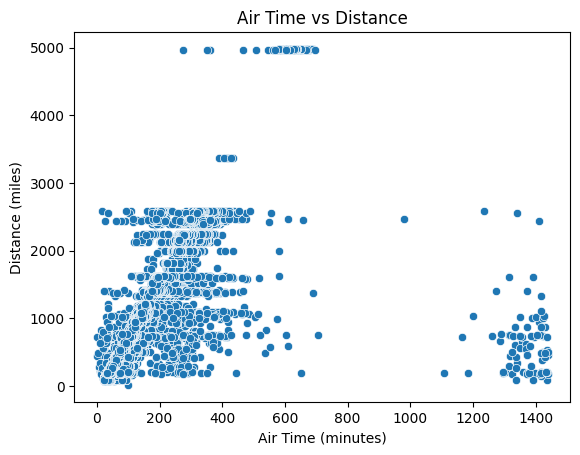

In [208]:
sns.scatterplot(x='air_time', y='distance', data=combined_data)
plt.xlabel('Air Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Air Time vs Distance')


The above scatterplot explores the relationship between distance and air_time of a flight visually. The assumption will be that longer the distance, the more the air_time will be and vice versa. However, the plot shows that there is no linear relation between the two variables. Neither parameter can be used to predict the other.

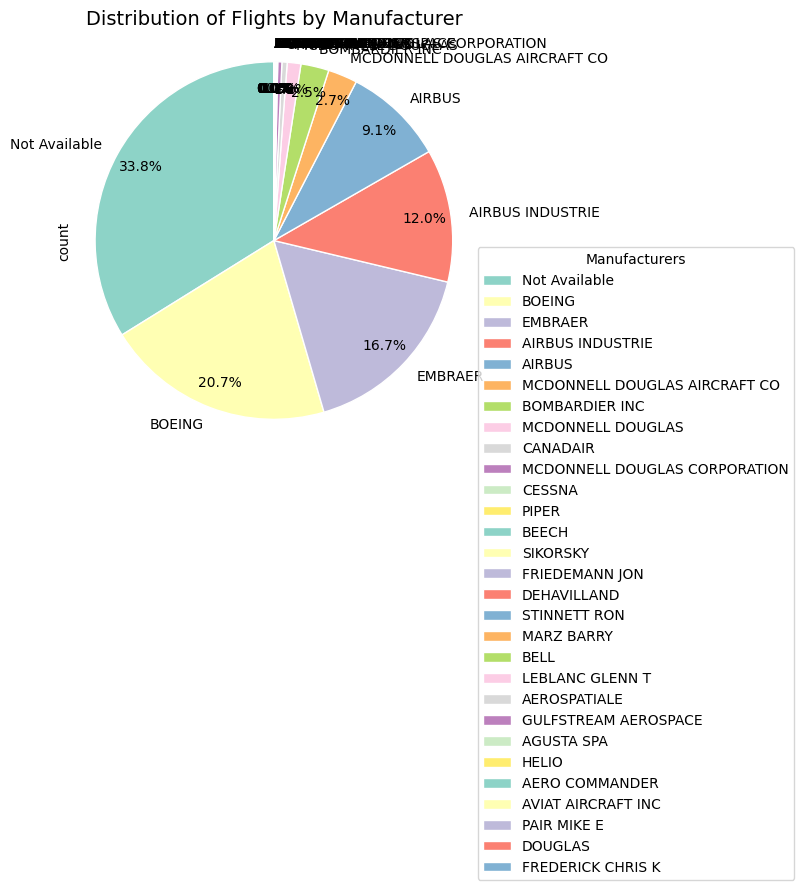

In [201]:
# Get value counts for manufacturer and plot pie chart without direct labels
plt.figure(figsize=(8, 8))
combined_data['manufacturer'].value_counts().plot.pie(
    autopct='%1.1f%%',          # Show percentages
    colors=plt.cm.Set3.colors,  # Use a soft colormap
    startangle=90,              # Start the pie chart at 90 degrees
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, # Thin white lines between slices
    pctdistance=0.85            # Pull the percentages inside the pie slices
)

# Add title
plt.title('Distribution of Flights by Manufacturer', fontsize=14)

# Add a legend instead of cluttering labels on the chart
plt.legend(labels=combined_data['manufacturer'].value_counts().index,
           loc='best', bbox_to_anchor=(1, 0.5), title="Manufacturers")

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.tight_layout()
plt.show()

The pie chart gives  the list of manufacturers and what percent they hold in global manufacturing

<Axes: xlabel='distance', ylabel='Count'>

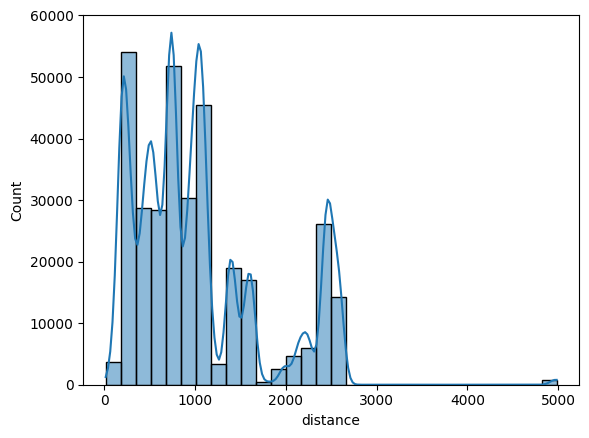

In [202]:
sns.histplot(combined_data['distance'], bins=30, kde=True)

The histogram above visualizes the distances covered by flights. It also consists of the kde plot which is the probability density function of the same. From the graph, maximum number of flights are short distance flight between 500-1000 miles. Very few flights are over longer distance. Showing that people prefer shorter flights. The same is observed by the probability distribution curve.

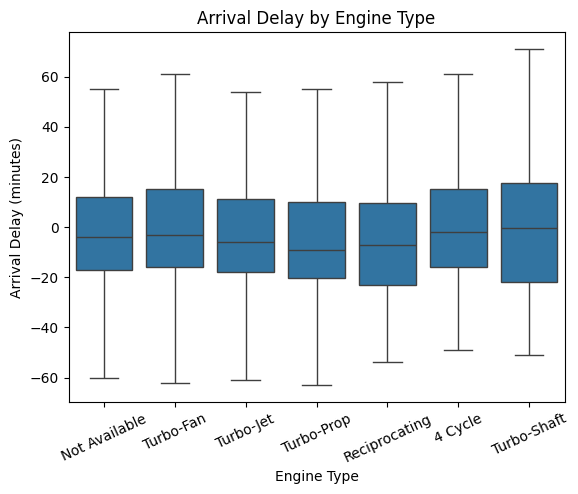

In [203]:
sns.boxplot(x='engine_type', y='arr_delay', data=combined_data, showfliers=False)
plt.xticks(rotation = 25)

plt.xlabel('Engine Type')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay by Engine Type')

# Display the plot
plt.show()


Boxplots for the different engine types of aircrafts vs arrival delays show that the engine type has not impact on the delays. Both the lower, higher whiskers, medians and quartiles of all box plots are in a similar range

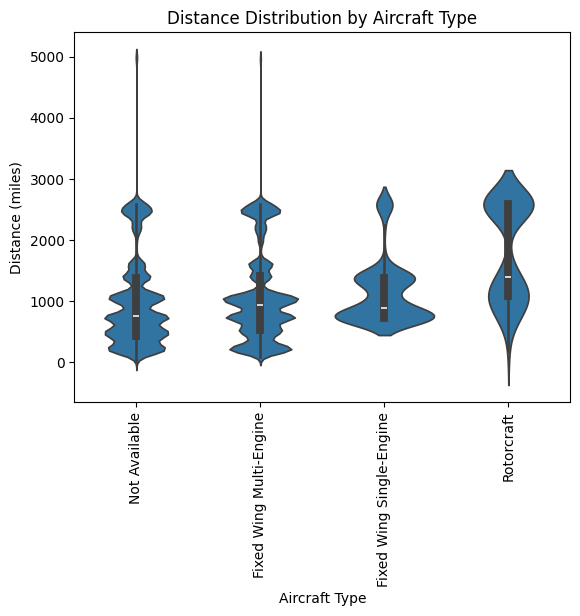

In [204]:
sns.violinplot(x='aircraft_type', y='distance', data=combined_data)
plt.xticks(rotation = 90)

plt.xlabel('Aircraft Type')
plt.ylabel('Distance (miles)')
plt.title('Distance Distribution by Aircraft Type')

# Display the plot
plt.show()


This violin plot helps visually compare the flight distance distributions for different aircraft types. Fixed Wing Multi-Engine aircraft handle a broader range of flight distances, with a peak density in the 1000-1500 mile range. Fixed Wing Single-Engine and Rotorcraft are primarily used for shorter flights, which aligns with their technical capabilities.




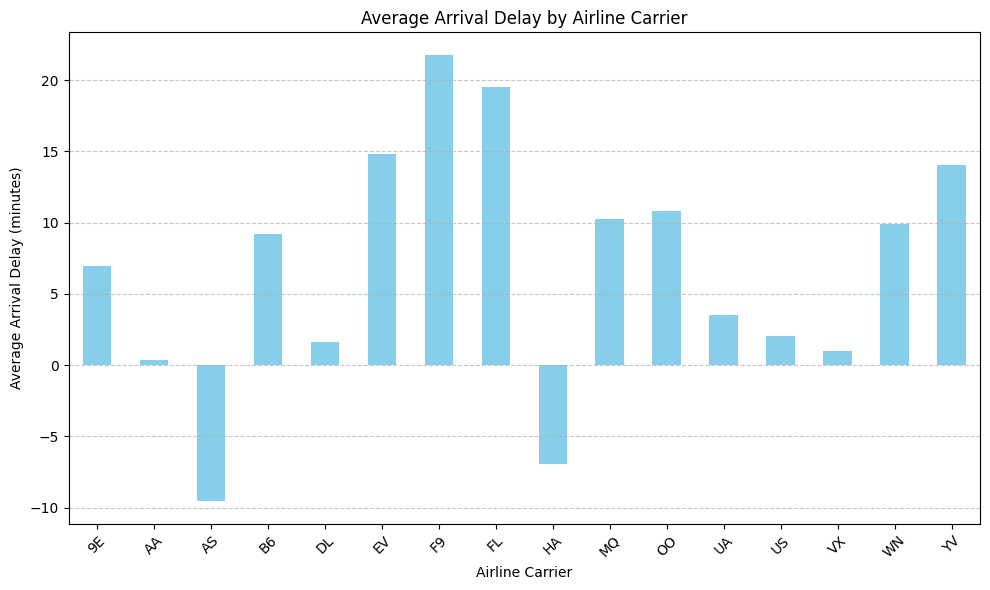

In [205]:

# Group by carrier and calculate the average arrival delay
carrier_avg_delay = combined_data.groupby('carrier')['arr_delay'].mean()

# Plotting a bar graph
plt.figure(figsize=(10,6))
carrier_avg_delay.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Airline Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airline Carrier')

# Adding grid lines (only for the y-axis for a cleaner look)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


This bar plot shows avg delay by airlines

This violin plot helps visually compare the flight distance distributions for different aircraft types. Fixed Wing Multi-Engine aircraft handle a broader range of flight distances, with a peak density in the 1000-1500 mile range.
Fixed Wing Single-Engine and Rotorcraft are primarily used for shorter flights, which aligns with their technical capabilities.

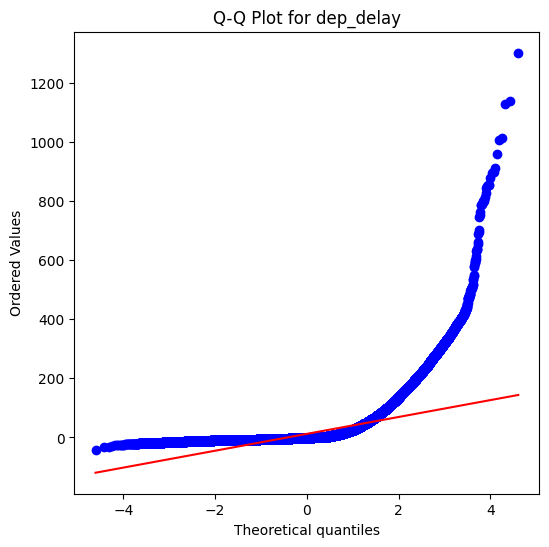

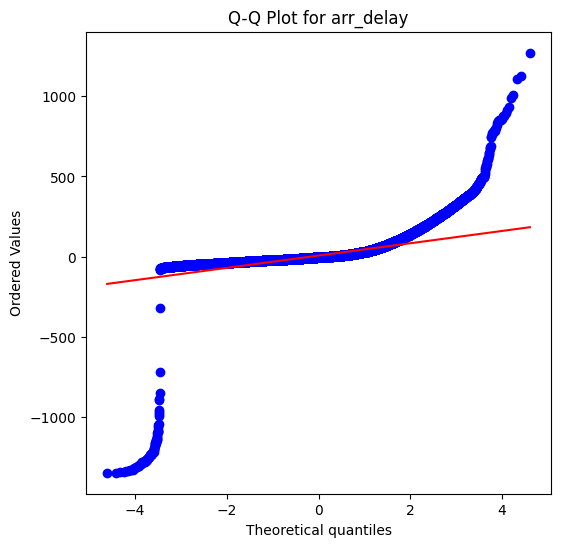

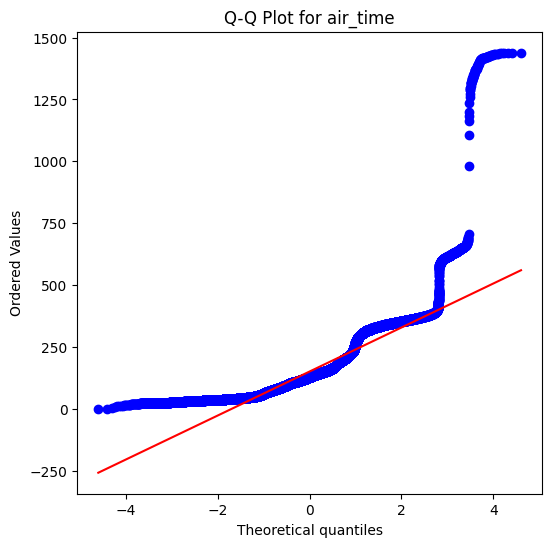

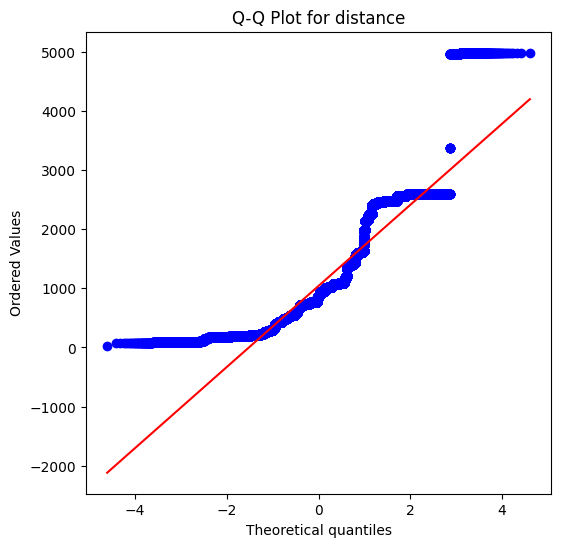

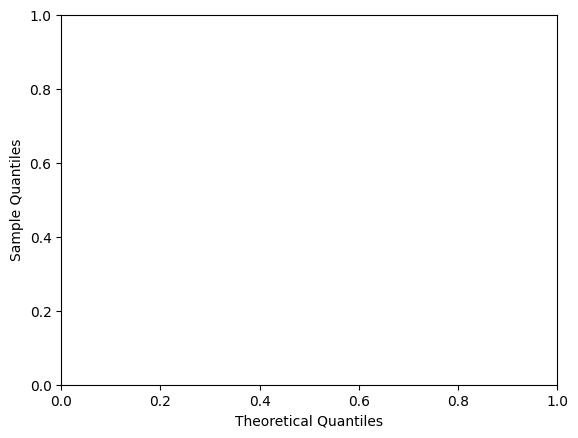

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
columns = ['dep_delay', 'arr_delay', 'air_time', 'distance']

for column in columns:
    if pd.api.types.is_numeric_dtype(combined_data[column]):
        plt.figure(figsize=(6, 6))
        stats.probplot(combined_data[column], dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for {column}")
        plt.show()
    else:
        print(f"Skipping {column}, it is not a numeric column.")

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


If the column is numeric, a Q-Q (quantile-quantile) plot is generated using stats.probplot(). The Q-Q plot is used to compare the distribution of the data in the column against a standard normal distribution (bell curve). This helps in assessing whether the data follows a normal distribution.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


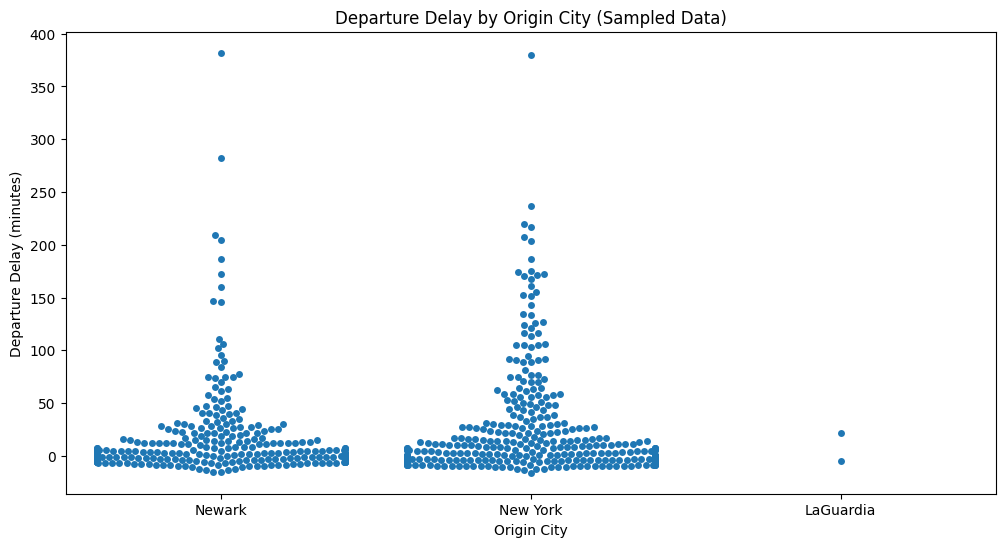

In [207]:
sampled_data = combined_data.sample(n=1000, random_state=42)
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Origin City', y='dep_delay', data=sampled_data)

plt.xlabel('Origin City')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay by Origin City (Sampled Data)')

plt.show()


The code takes a random sample of 1000 rows from the combined_data DataFrame. The random_state=42 ensures that the same sample is selected every time for reproducibility.
A swarm plot is then created using seaborn to visualize the relationship between the "Origin City" (on the x-axis) and "Dep Delay" (departure delay, on the y-axis).
The swarm plot shows individual data points, which helps in identifying the distribution and potential clusters of delays per origin city.